In [106]:
#импорт библиотек
import pandas as pd
import numpy as np
import random

#визуализация
import matplotlib.pyplot as plt

In [107]:
#загружаем данные
test = pd.read_csv('test_data.csv', delimiter=",") 
train = pd.read_csv('train_data.csv', delimiter=",")
attrition = pd.read_csv('sampleSubmission.csv', delimiter=",") 

In [108]:
train.head()

,Unnamed: 0,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,...,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,40,Travel_Rarely,Research & Development,2,3,Medical,Male,Research Director,Single,...,3.0,15,8,1,15.0,3,5,1,0,1
1,1,31,Travel_Rarely,Research & Development,28,4,Technical Degree,Female,Sales Executive,Married,...,1.0,11,8,0,10.0,4,10,0,2,0
2,2,35,Travel_Frequently,Research & Development,3,3,Medical,Female,Laboratory Technician,Married,...,1.0,11,8,1,2.0,2,2,2,2,0
3,3,33,Travel_Rarely,Research & Development,2,2,Medical,Male,Sales Executive,Single,...,0.0,18,8,3,4.0,4,3,0,2,0
4,4,32,Travel_Rarely,Research & Development,2,3,Medical,Male,Research Scientist,Married,...,1.0,13,8,0,8.0,0,8,0,7,0


Параметры:<br>
Age - возраст - числовое<br>
BusinessTravel - бизнес-поездки - часто/редко/нет<br>
Department - отдел - Исследования и разработки/Продажи/HR<br>
DistanceFromHome - расстояние до дома - числовое<br>
Education - образование - числа от 1 до 5<br>
EducationField - область/специальность - Медицина/Маркетинг/...<br>
Gender - пол - м/ж<br>
JobRole - должность - Директор/лаборант/...<br>
MaritalStatus - семейное положение - женат(замужем)/разведен/холост<br>
MonthlyIncome - доход в месяц - числовое<br>
NumCompaniesWorked - количество мест работы - числовое<br>
PercentSalaryHike - повышение зарплаты в процентах - числовое<br>
StandardHours - количество часов в рабочей смене - числовое<br>
StockOptionLevel - количество акций в компании - числовое<br>
TotalWorkingYears - всего рабочих лет - числовое<br>
TrainingTimesLastYear - количество тренировок в прошлом году? - числовое<br>
YearsAtCompany - количество лет в компании - числовое<br>
YearsSinceLastPromotion - количество лет с прошлого повышения - числовое<br>
YearsWithCurrManager - количество лет с нынешним менеджером - числовое<br>
Attrition - изнуренность/усталость - да/нет

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 21 columns):
Unnamed: 0                 2205 non-null int64
Age                        2205 non-null int64
BusinessTravel             2205 non-null object
Department                 2205 non-null object
DistanceFromHome           2205 non-null int64
Education                  2205 non-null int64
EducationField             2205 non-null object
Gender                     2205 non-null object
JobRole                    2205 non-null object
MaritalStatus              2205 non-null object
MonthlyIncome              2205 non-null int64
NumCompaniesWorked         2194 non-null float64
PercentSalaryHike          2205 non-null int64
StandardHours              2205 non-null int64
StockOptionLevel           2205 non-null int64
TotalWorkingYears          2199 non-null float64
TrainingTimesLastYear      2205 non-null int64
YearsAtCompany             2205 non-null int64
YearsSinceLastPromotion    2205 non-n

Всего 2205 строк данных. <br>
Есть пропуски в параметрах NumCompaniesWorked и TotalWorkingYears, нужно заполнить значениями.

In [110]:
#посмотрим на средние значения
train_mean = train.mean()
train_mean

Unnamed: 0                  1102.000000
Age                           36.669841
DistanceFromHome               9.409524
Education                      2.895692
MonthlyIncome              65151.972789
NumCompaniesWorked             2.648587
PercentSalaryHike             15.209524
StandardHours                  8.000000
StockOptionLevel               0.822222
TotalWorkingYears             11.224193
TrainingTimesLastYear          2.798186
YearsAtCompany                 7.078005
YearsSinceLastPromotion        2.225397
YearsWithCurrManager           4.156463
Attrition                      0.161451
dtype: float64

In [111]:
#посмотрим на медианы
train_median = train.median()
train_median

Unnamed: 0                  1102.0
Age                           35.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              48770.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
Attrition                      0.0
dtype: float64

Значения отличаются не сильно, но так как могут быть шумы, заменим на медианы.

In [112]:
train.fillna(train_median, inplace=True)
train.isnull().sum()

Unnamed: 0                 0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64

От пустых значений избавились. Приступим к шумам и выбросам.

In [113]:
train.describe()

,Unnamed: 0,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,36.669841,9.409524,2.895692,65151.972789,2.645351,15.209524,8.0,0.822222,11.220862,2.798186,7.078005,2.225397,4.156463,0.161451
std,636.672993,9.078445,8.134342,1.046125,47711.864224,2.485043,3.638322,0.0,0.874708,7.886428,1.313616,6.258446,3.312585,3.606622,0.368030
min,0.000000,18.000000,1.000000,1.000000,10510.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,551.000000,30.000000,2.000000,2.000000,28750.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,0.000000
50%,1102.000000,35.000000,7.000000,3.000000,48770.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,0.000000
75%,1653.000000,42.000000,15.000000,4.000000,83460.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,10.000000,3.000000,7.000000,0.000000
max,2204.000000,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,1.000000


На первый взгдяд выбросов нет, нет неправдоподобных минимальных и максимальных значений. Проверим более детально.

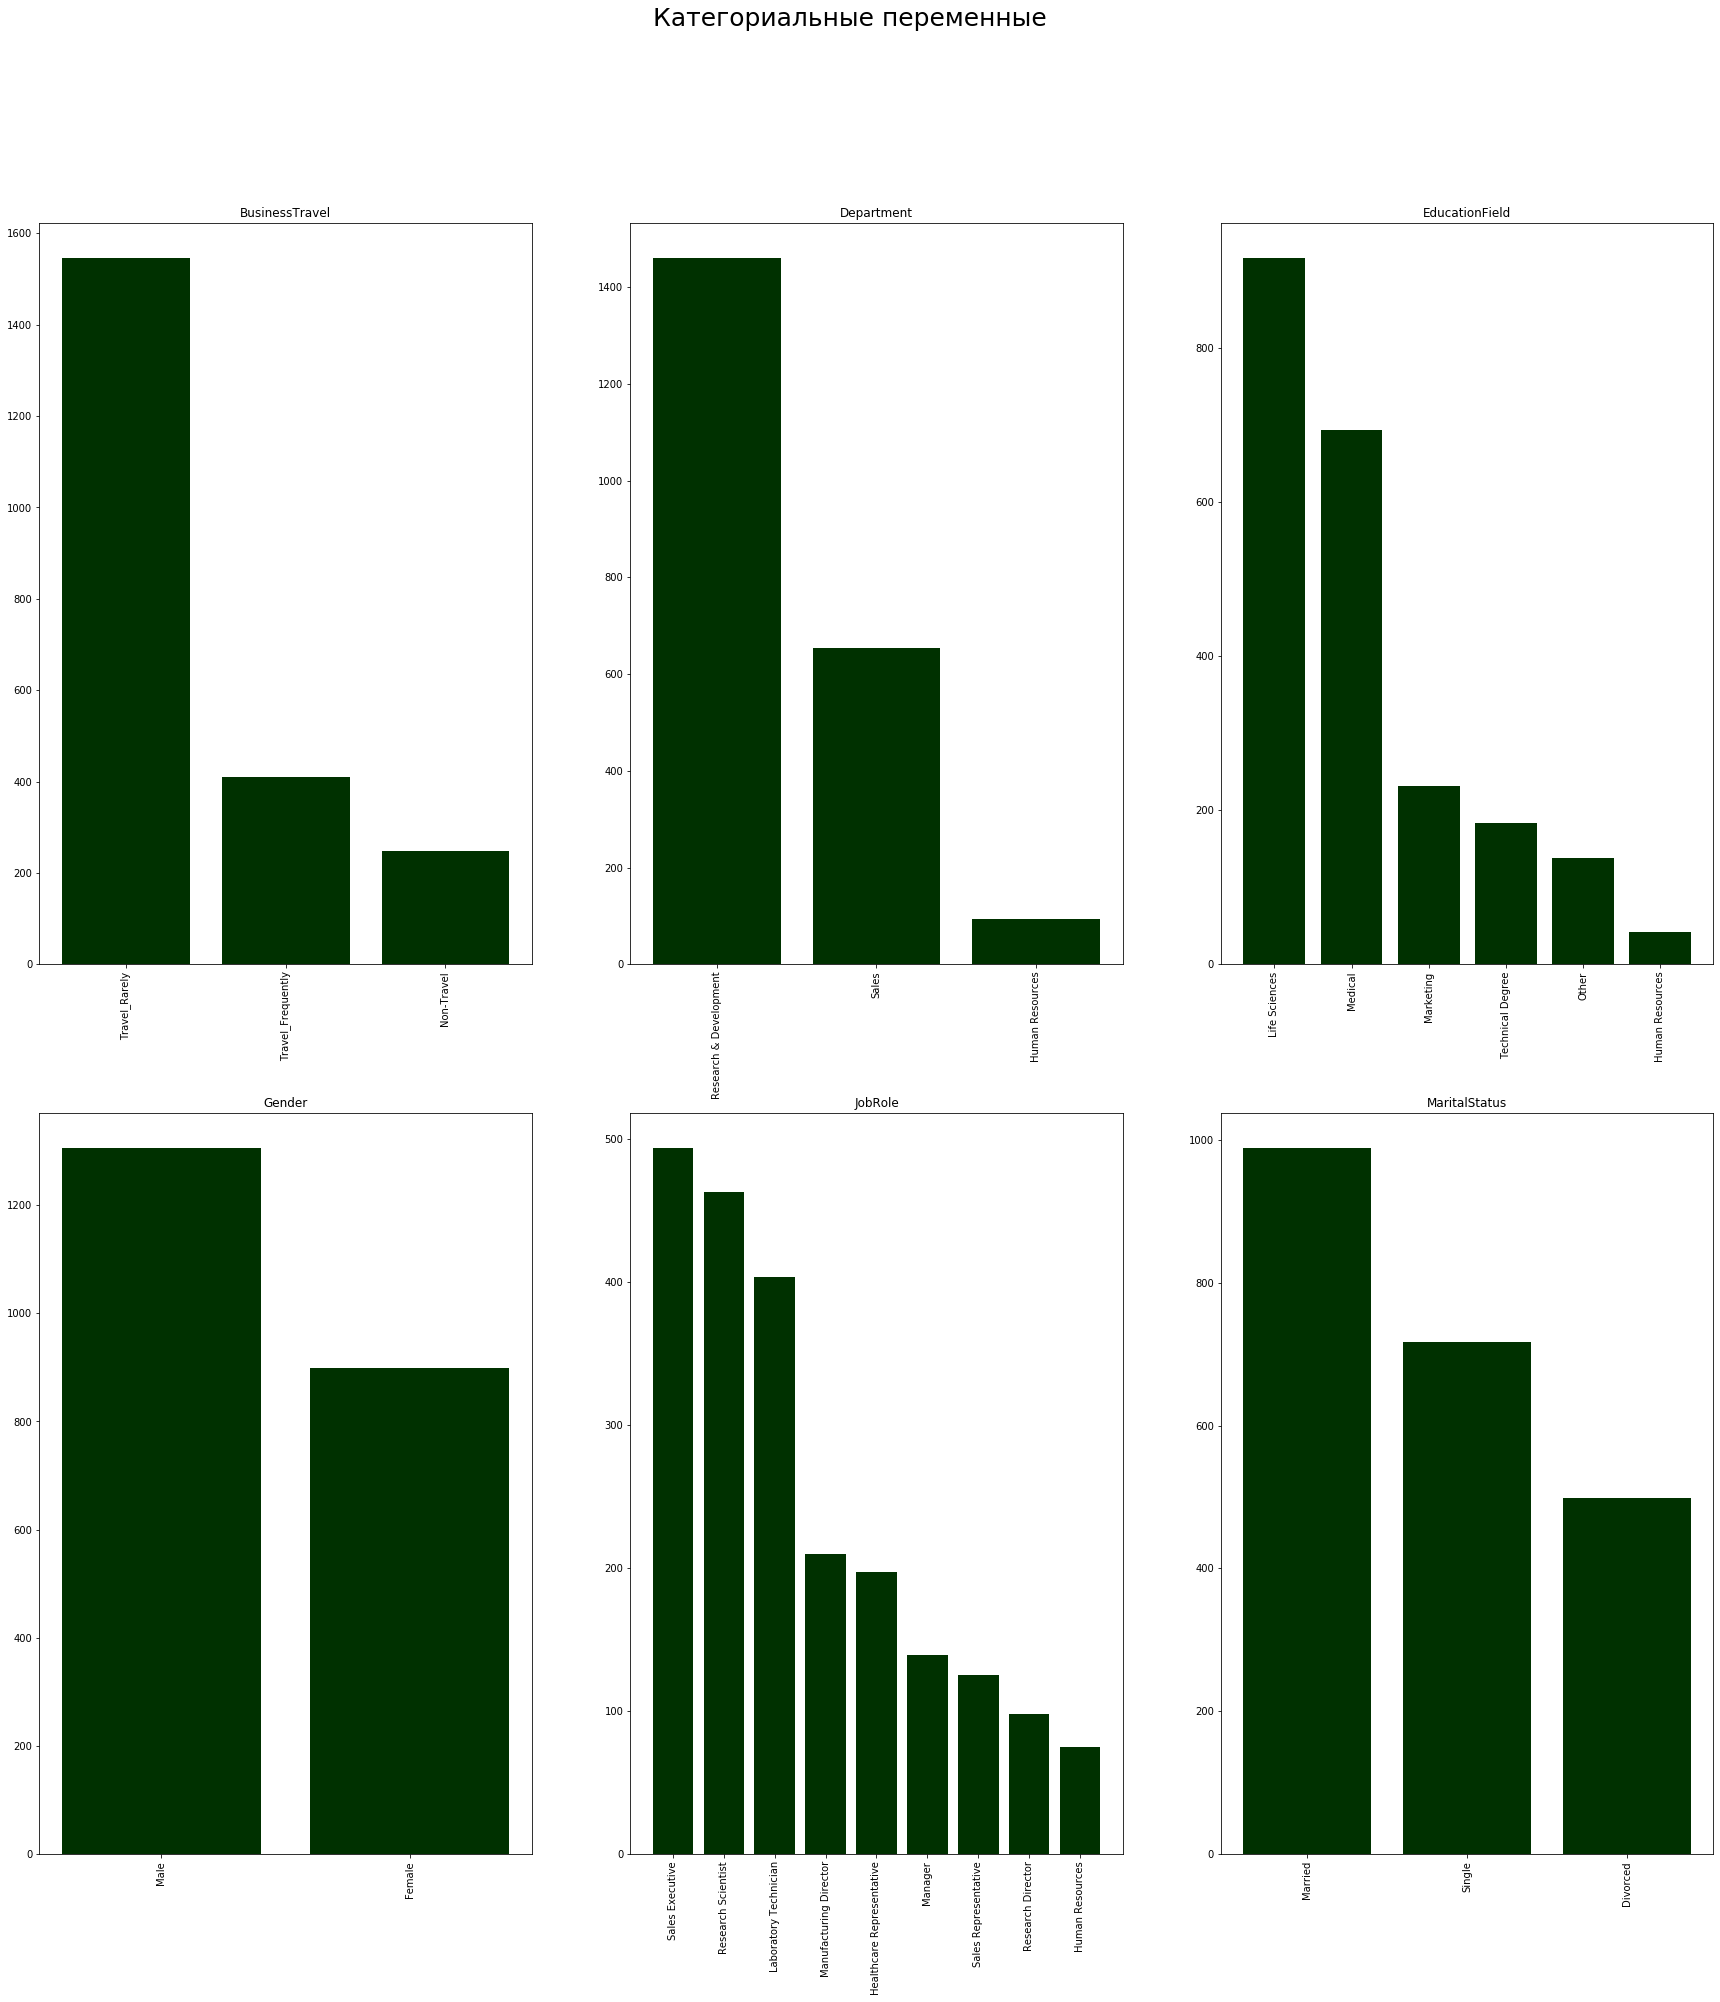

In [114]:
cat_columns = ['BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus']
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(30, 30))
plt.suptitle('Категориальные переменные', fontsize = 25)
counter = 0
colors = '#003100'
for cat_column in cat_columns:
    value_counts = train[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = colors)
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Выбросов и аномалий выявлено не было, теперь посмотрим числовые предикторы.

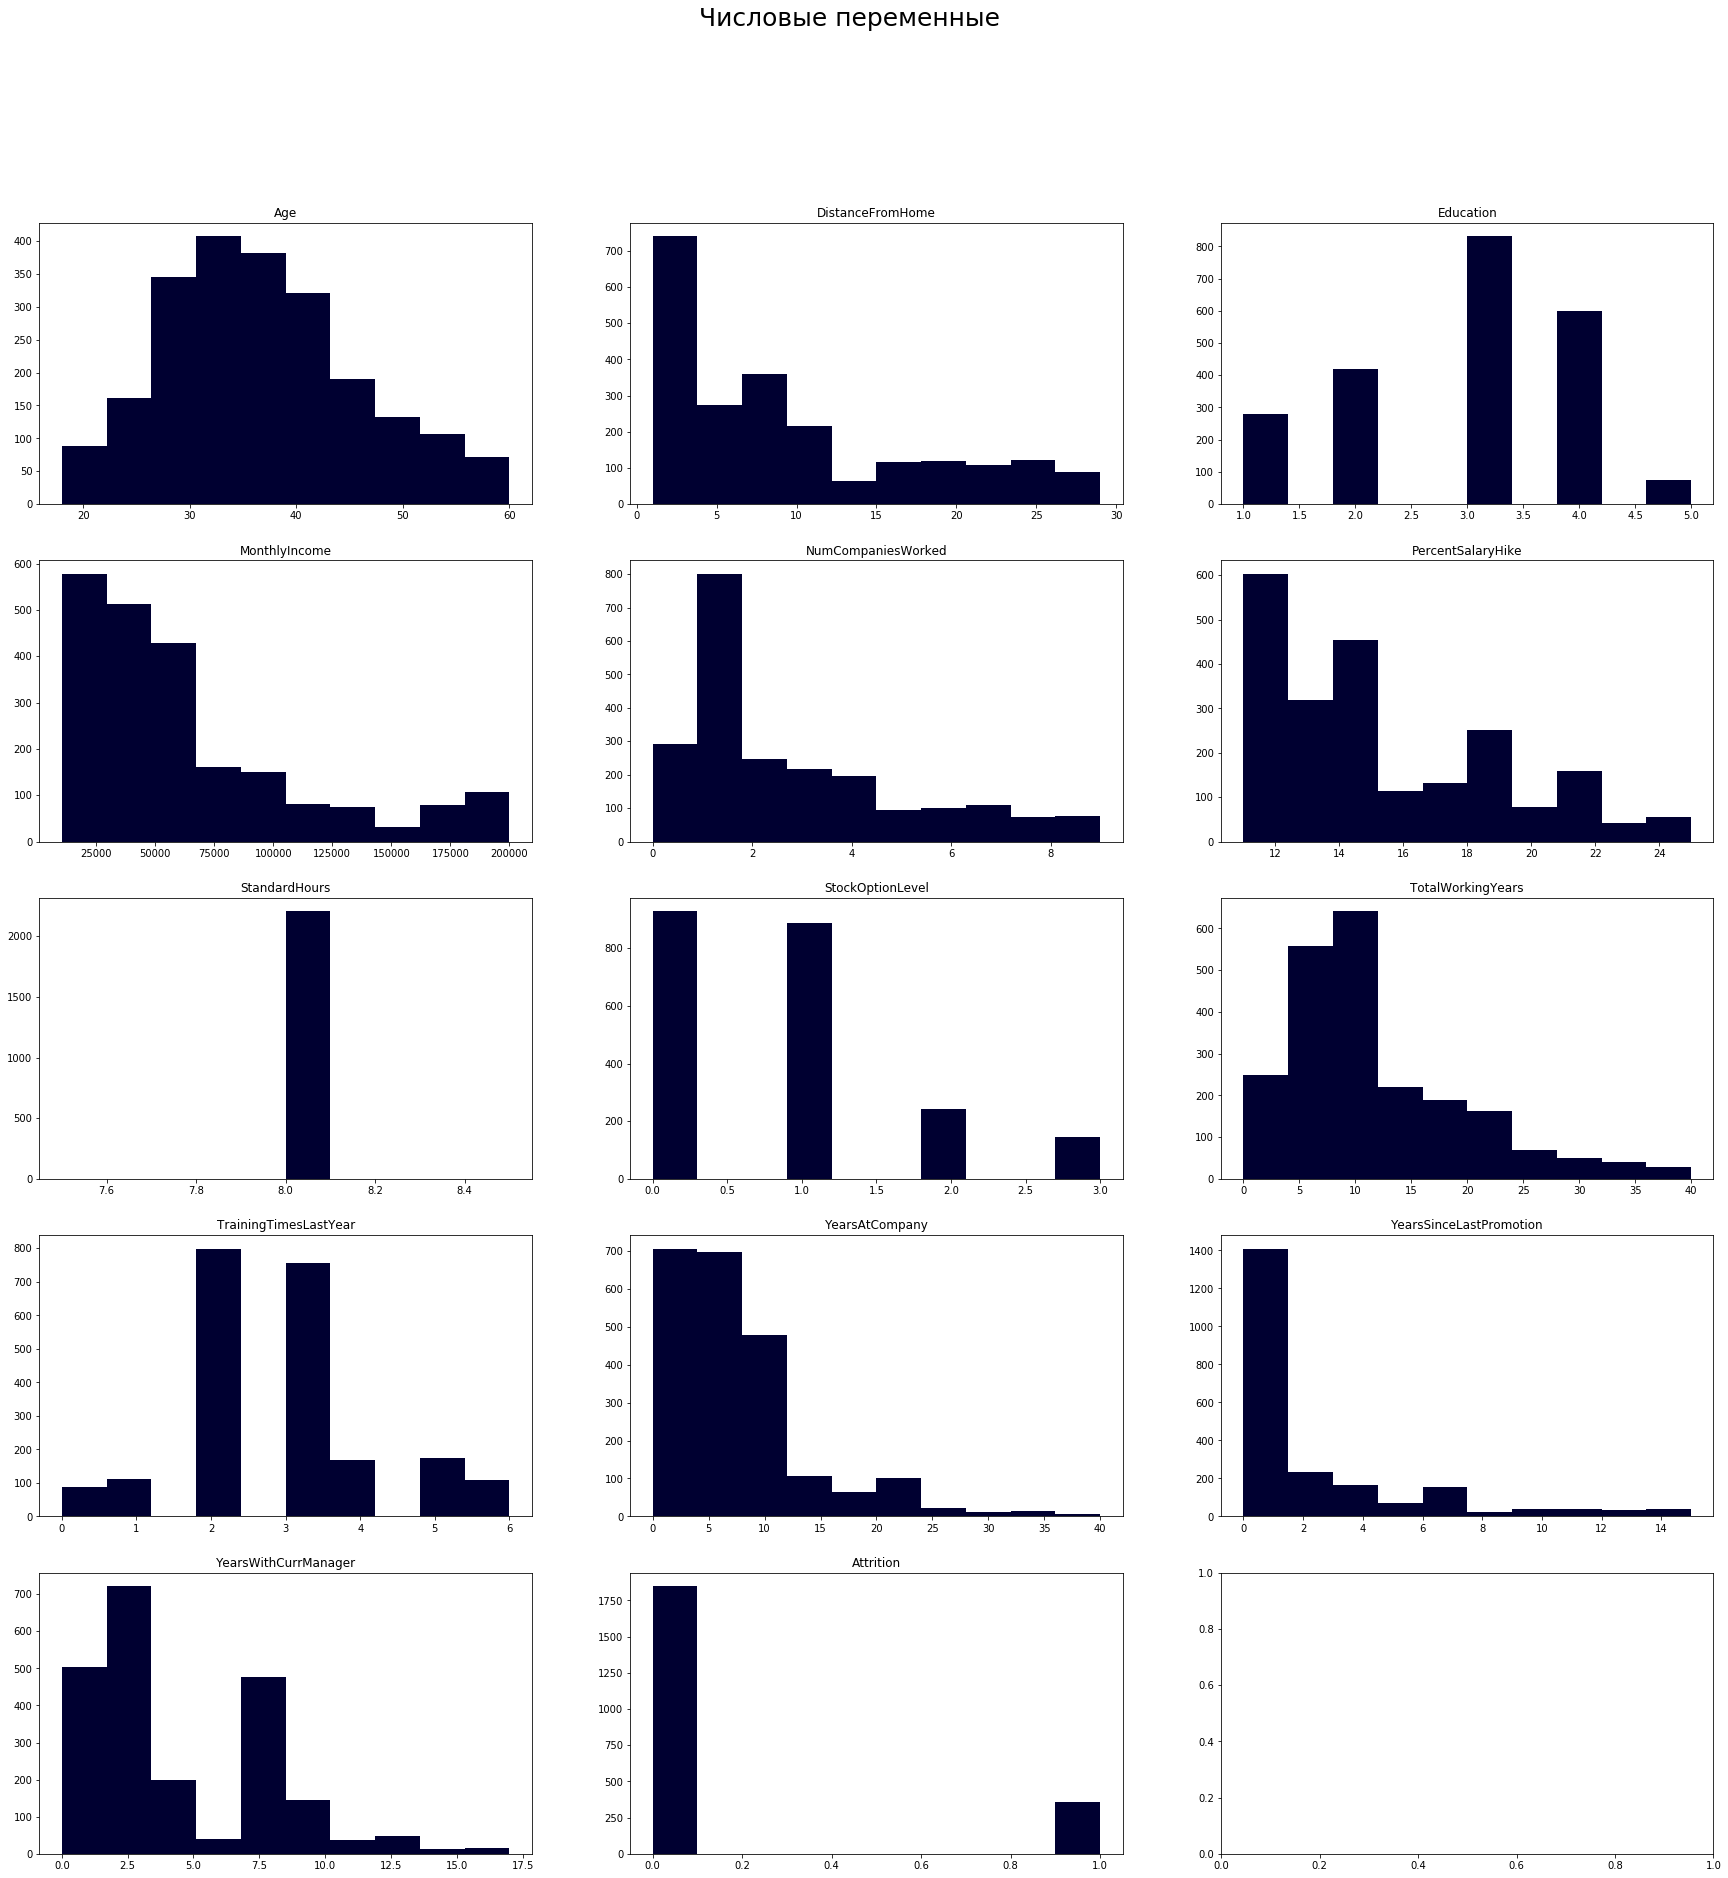

In [115]:
num_columns = ['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(30, 30))
plt.suptitle('Числовые переменные', fontsize = 25)
colors = '#000031'
counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(train[num_column], color = colors)
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Выбросов не вижу, но можно будет позже попробовать PCA.<br>
Поле StandardHours всегда равен 8, поэтому его можно удалить.

In [116]:
train = train.drop(columns = ['StandardHours'])

In [117]:
#посмотрим на целевую переменную
train['Attrition'].value_counts()

0    1849
1     356
Name: Attrition, dtype: int64

Целевая переменная не сбалансирована, то есть если наша модели всегда будет предсказывать 0, то верность прогноза будет около 80%. Это надо обработать.

In [118]:
target_variable_name = 'Attrition'
training_values = train[target_variable_name]

training_points = train.drop(target_variable_name, axis=1)

Попробуем из категориальных признаков сделать числовые

In [119]:
def show_unique(df):
    unique = {}
    
    for col in df.columns:
        values = np.sort(df[col].unique())
        unique[col] = [len(values), values]
    
    for col in unique:
        print('Column {} has {} unique values: {} \n'.format(col, unique[col][0], unique[col][1]))

In [120]:
show_unique(train)

Column Unnamed: 0 has 2205 unique values: [   0    1    2 ... 2202 2203 2204] 

Column Age has 43 unique values: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60] 

Column BusinessTravel has 3 unique values: ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] 

Column Department has 3 unique values: ['Human Resources' 'Research & Development' 'Sales'] 

Column DistanceFromHome has 29 unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 

Column Education has 5 unique values: [1 2 3 4 5] 

Column EducationField has 6 unique values: ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree'] 

Column Gender has 2 unique values: ['Female' 'Male'] 

Column JobRole has 9 unique values: ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'S

Можем закодировать поля BusinessTravel

In [121]:
BusinessTravel_map = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
training_points['BusinessTravel'] = training_points['BusinessTravel'].map(BusinessTravel_map)

Приступим к тестовой выборке.

In [122]:
test.describe()

,Unnamed: 0,index,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2197.000000,2205.000000,2205.0,2205.000000,2202.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,1102.000000,37.177778,8.975510,2.930159,64906.653061,2.741010,15.209524,8.0,0.765533,11.335604,2.800454,6.938322,2.150113,4.089796
std,636.672993,636.672993,9.182865,8.071613,1.001189,46427.509701,2.506606,3.680601,0.0,0.827658,7.667351,1.264157,5.989465,3.128474,3.528097
min,0.000000,0.000000,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,551.000000,551.000000,30.000000,2.000000,2.000000,29360.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,1102.000000,1102.000000,36.000000,7.000000,3.000000,49600.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,1653.000000,1653.000000,43.000000,13.000000,4.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,2204.000000,2204.000000,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [123]:
test = test.drop(columns = ['StandardHours'])
test['BusinessTravel'] = test['BusinessTravel'].map(BusinessTravel_map)

In [124]:
test.fillna(train_median, inplace=True)

В тестовых данных есть лишний столбец id, которого нет в обучающей выборке. Прежде чем применять модель на тестовой выборке, необходимо убрать его. 

In [125]:
id_variable_name = 'index'
ids = test[id_variable_name] # записываем столбец id в отдельную переменную
test_points = test.drop(id_variable_name, axis=1) # удаляем его из тестовой выборки 

In [127]:
#кодируем текстовые 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

text_features = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
label_encoder = LabelEncoder()
for col in text_features:
    training_points[col] = label_encoder.fit_transform(train[col]) + 1
    test_points[col] = label_encoder.transform(test_points[col]) + 1

Переходим к обучению модели на коробочных решениях.

In [129]:
import xgboost as xgb

#тренируем модель
xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=8)

xgb.fit(training_points, training_values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [130]:
from sklearn.model_selection import cross_val_predict
cross_validation_predictions = cross_val_predict(xgboost_model, training_points, training_values, 
                                                 cv=5, method='predict_proba')
cross_validation_predictions = cross_validation_predictions[:, 1] # нам нужны вероятности для второго класса
cross_validation_predictions

array([0.8290485 , 0.30465826, 0.83334595, ..., 0.0026802 , 0.01028071,
       0.01087547], dtype=float32)

In [131]:
from sklearn.metrics import average_precision_score # площадь под precision recall кривой

In [132]:
average_precision_score (training_values, cross_validation_predictions) 

0.3062947493896248

In [133]:
test_predictions = xgb.predict_proba(test_points)[:, 1]

In [134]:
result = pd.DataFrame(columns=['index', 'Attrition'])

In [135]:
result['index'] = ids
result['Attrition'] = test_predictions

In [136]:
result.to_csv('result.csv', index=False)

Получилась 30%((